In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tensorflow imports below...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import timeseries_dataset_from_array, to_categorical



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_csv('/content/drive/MyDrive/project_4/fashion-mnist_train.csv')

In [12]:
df.shape

(60000, 785)

In [56]:
X = df.drop(columns='label')
y = df['label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

In [65]:
X_train = np.reshape(np.array(X_train),(-1, 28,28, 1))
X_test = np.reshape(np.array(X_test),(-1, 28,28,1))
X_train = X_train / 255
X_test = X_test / 255

In [66]:
X_train[0].shape

(28, 28, 1)

In [84]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [86]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [87]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=5
)

Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.6656 - acc: 0.7568 - val_loss: 0.4661 - val_acc: 0.8264
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.4242 - acc: 0.8491 - val_loss: 0.3865 - val_acc: 0.8580
Epoch 3/5
375/375 [==============================] - 2s 4ms/step - loss: 0.3672 - acc: 0.8685 - val_loss: 0.3374 - val_acc: 0.8810
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3382 - acc: 0.8804 - val_loss: 0.3208 - val_acc: 0.8877
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3144 - acc: 0.8880 - val_loss: 0.3193 - val_acc: 0.8844


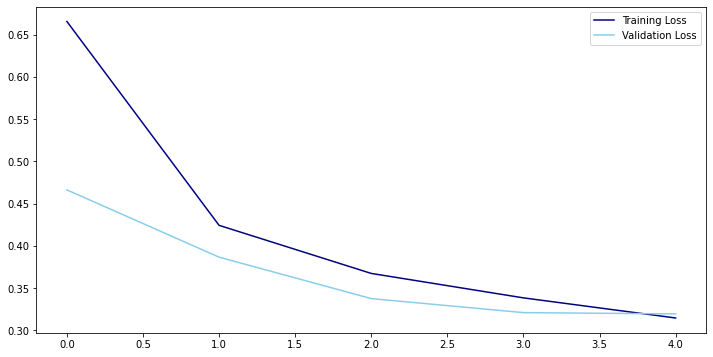

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/project_4/model1_ks.jpg');

In [89]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 2s 5ms/step - loss: 0.3193 - acc: 0.8844


[0.3192874789237976, 0.8844166398048401]

In [96]:
y_pred = np.argmax(model.predict(X_test), axis=1)

375/375 [==============================] - 1s 2ms/step


In [114]:
clothing = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pred_clothes = pd.DataFrame(confusion_matrix(y_test, y_pred), index=clothing, columns=clothing)

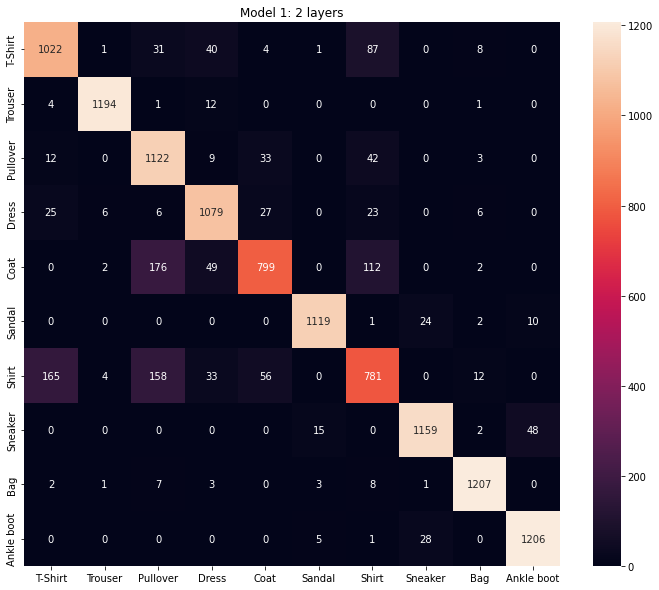

In [173]:
plt.figure(figsize=(12,10))
sns.heatmap(pred_clothes, annot=True, fmt='g')
plt.title('Model 1: 2 layers')
plt.savefig('/content/drive/MyDrive/project_4/cm1.jpg');

In [159]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [160]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 3136)              0         
                                                                 
 dense_23 (Dense)            (None, 64)              

In [161]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [162]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=10
)

Epoch 1/10


ValueError: ignored

In [163]:
# Second model, 1 Conv2D layer

model2 = Sequential()
model2.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D(2))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
) 

Epoch 1/10
188/188 [==============================] - 3s 10ms/step - loss: 0.7549 - acc: 0.7294 - val_loss: 0.5186 - val_acc: 0.8088
Epoch 2/10
188/188 [==============================] - 1s 8ms/step - loss: 0.4773 - acc: 0.8268 - val_loss: 0.4370 - val_acc: 0.8399
Epoch 3/10
188/188 [==============================] - 1s 7ms/step - loss: 0.4136 - acc: 0.8537 - val_loss: 0.3841 - val_acc: 0.8593
Epoch 4/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3793 - acc: 0.8656 - val_loss: 0.3596 - val_acc: 0.8719
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 0.3524 - acc: 0.8749 - val_loss: 0.3635 - val_acc: 0.8662
Epoch 6/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3338 - acc: 0.8810 - val_loss: 0.3648 - val_acc: 0.8674
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3187 - acc: 0.8868 - val_loss: 0.3255 - val_acc: 0.8812
Epoch 8/10
188/188 [==============================] - 1s 7ms/step - loss: 0

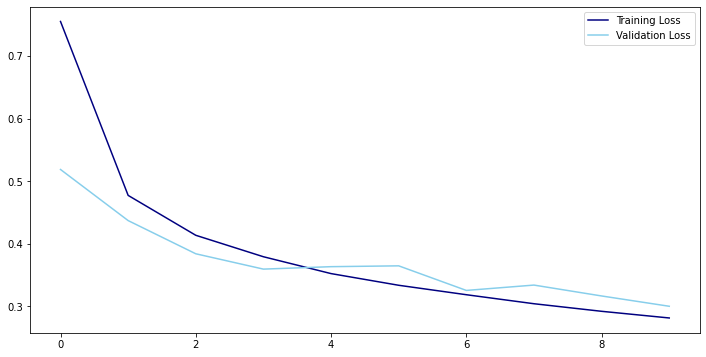

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], c='navy', label='Training Loss')
plt.plot(history2.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/project_4/model2_ks.jpg');

In [171]:
model2.evaluate(X_test, y_test)

375/375 [==============================] - 2s 4ms/step - loss: 0.3003 - acc: 0.8907


[0.3002578616142273, 0.890666663646698]

In [180]:
y_pred2 = np.argmax(model2.predict(X_test), axis=1)

375/375 [==============================] - 1s 2ms/step


In [181]:
clothing = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pred_clothes = pd.DataFrame(confusion_matrix(y_test, y_pred2), index=clothing, columns=clothing)

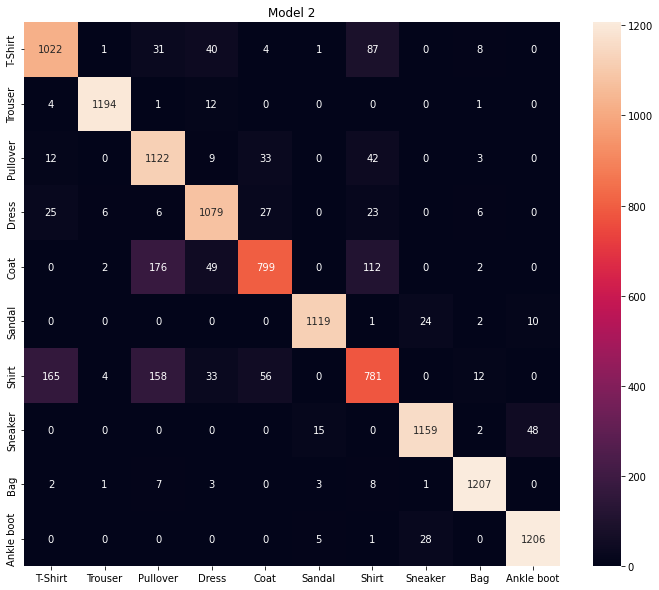

In [182]:
plt.figure(figsize=(12,10))
sns.heatmap(pred_clothes, annot=True, fmt='g')
plt.title('Model 2')
plt.savefig('/content/drive/MyDrive/project_4/cm2.jpg');

In [183]:
# Third model, 2nd model with dense reg.

model3 = Sequential()
model3.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(2))
model3.add(Conv2D(64, 3, activation='relu'))
model3.add(MaxPooling2D(2))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
) 


Epoch 1/10
188/188 [==============================] - 3s 9ms/step - loss: 0.8448 - acc: 0.6881 - val_loss: 0.5437 - val_acc: 0.7791
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.5178 - acc: 0.8099 - val_loss: 0.4288 - val_acc: 0.8484
Epoch 3/10
188/188 [==============================] - 2s 11ms/step - loss: 0.4532 - acc: 0.8347 - val_loss: 0.3733 - val_acc: 0.8706
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.4136 - acc: 0.8494 - val_loss: 0.4137 - val_acc: 0.8468
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.3903 - acc: 0.8584 - val_loss: 0.3337 - val_acc: 0.8815
Epoch 6/10
188/188 [==============================] - 2s 12ms/step - loss: 0.3688 - acc: 0.8651 - val_loss: 0.3510 - val_acc: 0.8719
Epoch 7/10
188/188 [==============================] - 2s 10ms/step - loss: 0.3504 - acc: 0.8739 - val_loss: 0.3083 - val_acc: 0.8896
Epoch 8/10
188/188 [==============================] - 1s 8ms/step - los

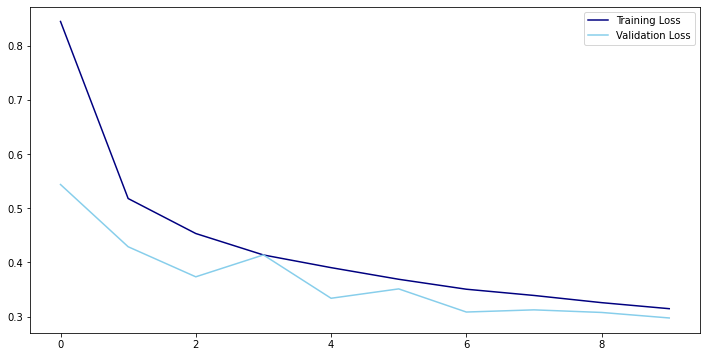

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(history3.history['loss'], c='navy', label='Training Loss')
plt.plot(history3.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/project_4/model3_ks.jpg');

In [190]:
model3.evaluate(X_test, y_test)

375/375 [==============================] - 2s 5ms/step - loss: 0.2973 - acc: 0.8895


[0.29731285572052, 0.8895000219345093]

In [185]:
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

375/375 [==============================] - 1s 2ms/step


In [186]:
clothing = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pred_clothes = pd.DataFrame(confusion_matrix(y_test, y_pred3), index=clothing, columns=clothing)

In [197]:
pred_clothes

,T-Shirt,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-Shirt,1056,0,20,25,1,1,86,0,5,0
Trouser,2,1199,0,10,0,0,1,0,0,0
Pullover,12,0,1086,11,41,0,69,0,2,0
Dress,18,6,2,1089,26,1,25,0,5,0
Coat,3,1,96,26,952,0,61,0,1,0
Sandal,1,0,0,1,0,1087,0,38,2,27
Shirt,159,4,73,26,70,0,871,0,6,0
Sneaker,0,0,0,0,0,2,0,1195,0,27
Bag,6,1,3,7,1,0,8,4,1202,0
Ankle boot,0,0,0,0,0,1,0,37,0,1202


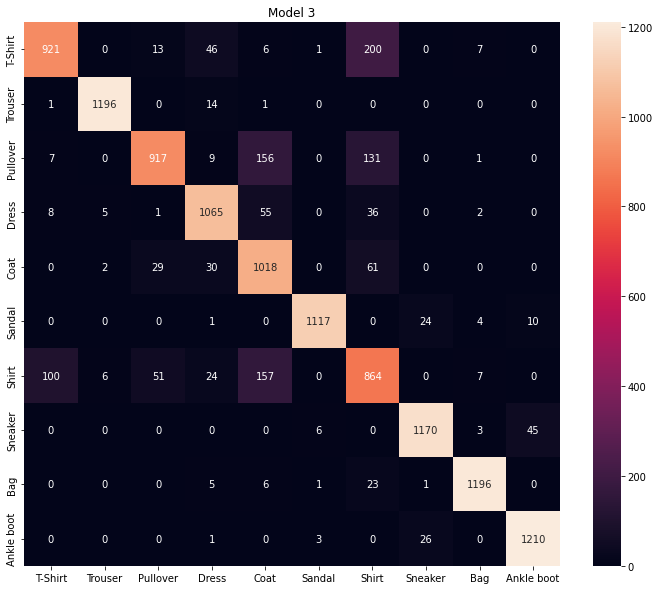

In [187]:
plt.figure(figsize=(12,10))
sns.heatmap(pred_clothes, annot=True, fmt='g')
plt.title('Model 3')
plt.savefig('/content/drive/MyDrive/project_4/cm3.jpg');

In [192]:
# Four Model, added another Conv2D layer, changed optimizer to 'adam'
model4 = Sequential()
model4.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model4.add(MaxPooling2D(2))
model4.add(Conv2D(64, 3, activation='relu'))
model4.add(MaxPooling2D(2))
model4.add(Conv2D(128, 3, activation='relu'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

history4 = model4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=15
)

Epoch 1/15
188/188 [==============================] - 3s 9ms/step - loss: 0.7217 - accuracy: 0.7406 - val_loss: 0.4690 - val_accuracy: 0.8201
Epoch 2/15
188/188 [==============================] - 1s 8ms/step - loss: 0.4302 - accuracy: 0.8438 - val_loss: 0.3610 - val_accuracy: 0.8700
Epoch 3/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3596 - accuracy: 0.8713 - val_loss: 0.3454 - val_accuracy: 0.8717
Epoch 4/15
188/188 [==============================] - 2s 10ms/step - loss: 0.3275 - accuracy: 0.8810 - val_loss: 0.3146 - val_accuracy: 0.8884
Epoch 5/15
188/188 [==============================] - 2s 13ms/step - loss: 0.2981 - accuracy: 0.8923 - val_loss: 0.2929 - val_accuracy: 0.8927
Epoch 6/15
188/188 [==============================] - 2s 10ms/step - loss: 0.2770 - accuracy: 0.9003 - val_loss: 0.3062 - val_accuracy: 0.8878
Epoch 7/15
188/188 [==============================] - 2s 11ms/step - loss: 0.2595 - accuracy: 0.9057 - val_loss: 0.2685 - val_accuracy: 0.9031
Ep

In [193]:
model4.evaluate(X_test, y_test)

375/375 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.9116


[0.25924935936927795, 0.9115833044052124]

In [194]:
y_pred4 = np.argmax(model4.predict(X_test), axis=1)

375/375 [==============================] - 1s 2ms/step


In [195]:
clothing = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
pred_clothes = pd.DataFrame(confusion_matrix(y_test, y_pred4), index=clothing, columns=clothing)

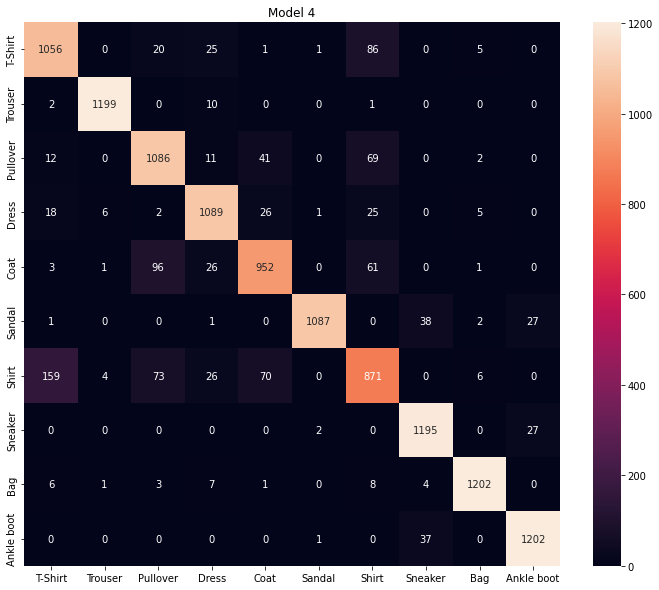

In [196]:
plt.figure(figsize=(12,10))
sns.heatmap(pred_clothes, annot=True, fmt='g')
plt.title('Model 4')
plt.savefig('/content/drive/MyDrive/project_4/cm4.jpg');

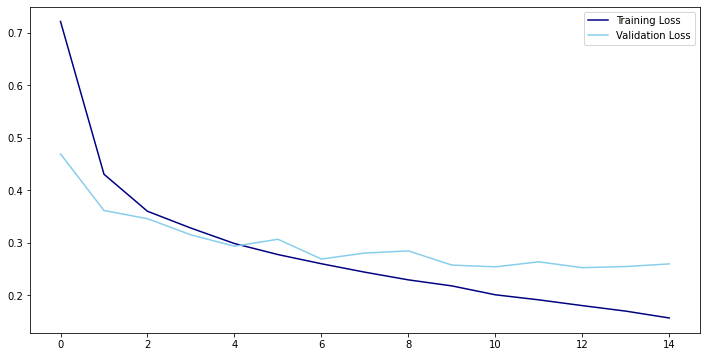

In [202]:
plt.figure(figsize=(12, 6))
plt.plot(history4.history['loss'], c='navy', label='Training Loss')
plt.plot(history4.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/project_4/model4_ks.jpg');